In [67]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
# read .dat file
def read_dat(filename):
    with open(filename, 'r') as f:
        reader = csv.reader(f, delimiter=' ')
        data = list(reader)        
    return data

male_data = []
femele_data = []

for data in read_dat('hw3_male.dat'):
    male_data.append(float(data[0]))

for data in read_dat('hw3_female.dat'):
    femele_data.append(float(data[0]))

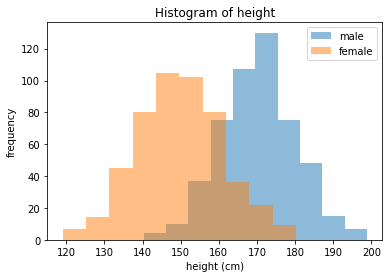

In [37]:
# plot histogram
plt.hist(male_data, alpha=0.5, label='male')
plt.hist(femele_data, alpha=0.5, label='female')

plt.legend()
plt.title('Histogram of height')
plt.xlabel('height (cm)')
plt.ylabel('frequency')
plt.show()

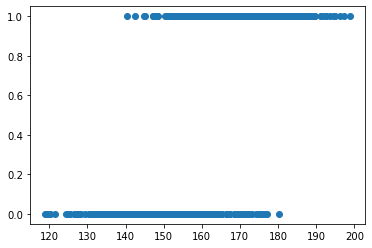

In [57]:
x = male_data+femele_data
y = [1]*len(male_data) + [0]*len(femele_data)

plt.scatter(x, y)

In [56]:
# data
height = male_data+femele_data
sex = [1]*len(male_data) + [0]*len(femele_data)

# Reshape height to a 2D array
height = np.array(height).reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(height, sex, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Now, you can use the trained model to predict the sex of a person based on their height
new_height = np.array([[170], [175]])
predicted_sex = model.predict(new_height)

print(f'Predicted Sex for new heights {new_height.flatten()}: {predicted_sex}')


Accuracy: 0.8366336633663366
Predicted Sex for new heights [170 175]: [1 1]


In [68]:
from sklearn.metrics import confusion_matrix

[[80 20]
 [13 89]]


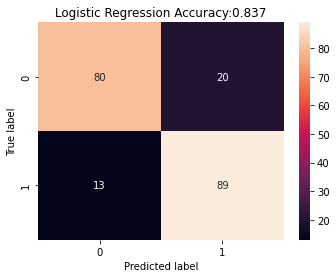

In [65]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('Logistic Regression Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [70]:
# Calculate precision
precision = cm[1,1] / (cm[0,1] + cm[1,1])
print(f'Precision: {precision}')

# Calculate recall
recall = cm[1,1] / (cm[1,0] + cm[1,1])
print(f'Recall: {recall}')

# sensitivity
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
print(f'sensitivity: {sensitivity}')

# specificity
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
print(f'specificity: {specificity}')

# Calculate the F1 score
f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1 score: {f1}')

Precision: 0.8165137614678899
Recall: 0.8725490196078431
sensitivity: 0.8725490196078431
specificity: 0.8
F1 score: 0.8436018957345972


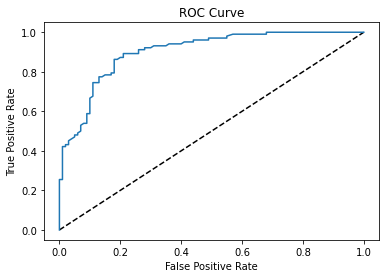

AUC Score: 0.9011764705882352


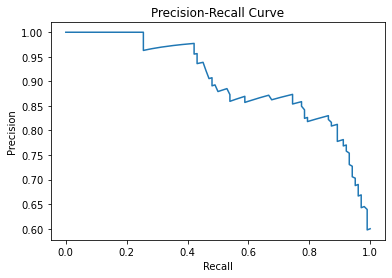

In [71]:
# plot ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Generate class probabilities
probs = model.predict_proba(X_test)

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Compute and print AUC score
auc = roc_auc_score(y_test, probs[:,1])
print(f'AUC Score: {auc}')

# plot precision-recall curve
from sklearn.metrics import precision_recall_curve

# Generate precision-recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs[:,1])

# Plot ROC curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()